
#Proyecto final de cursada Estadística + IOT

##*Integrantes:*

###*   Ferreyra Santiago
###*   Cesar Martins
###*   Gaston Trejo
###*   M. Victoria Urcola


Este dataset examina diversas ciudades en términos de su desarrollo como "ciudades inteligentes", considerando aspectos como movilidad, medio ambiente, gobierno, economía, personas y vida inteligente.

"...Se utilizaron diferentes tipos de sensores de IoT (Internet de las cosas) para recopilar y gestionar datos, combinada con muchas otras integraciones técnicas en los centros de nuestras ciudades, definiendo el futuro de la integración de los datos y la automatización en nuestra vida urbana. Piensese en las Smart Cities como una experiencia para el cliente, para los residentes de una ciudad.

El equipo de Leap Data utilizó índices reconocidos mundialmente (formalizados para la evaluación de iniciativas de ciudades inteligentes) y desarrolló un modelo de datos para interpretar la posición de Calgary y Edmonton en relación con los líderes globales de las actividades de ciudades inteligentes. Los índices utilizados para crear estos conocimientos se desarrollaron exclusivamente a partir de conjuntos de datos abiertos...", fuente  : 'https://www.kaggle.com/datasets/magdamonteiro/smart-cities-index-datasets' ,



#Desarrollo

In [61]:
# @title importamos pandas
import pandas as pd
import io
import os

import matplotlib.pyplot as plt


In [62]:
# @title cargamos DS por upload
'''
from google.colab import files
csvsubido = files.upload()

df = pd.read_csv(io.BytesIO(csvsubido['Smart_City_index_headers.csv']))
'''


"\nfrom google.colab import files\ncsvsubido = files.upload()\n\ndf = pd.read_csv(io.BytesIO(csvsubido['Smart_City_index_headers.csv']))\n"

In [63]:
# @title cargamos DS montando drive
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Grupo ISPC Innov/2024/Estadistica/IoT.csv/Smart_City_index_headers.csv'

df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



##Hacemos una exploración de nuestro DataSet

In [64]:
# @title Visualizamos cuántas filas y columnas trae el DS
df.shape

(102, 11)

In [65]:
# @title Traemos los nombres de las columnas
df.columns

Index(['Id', 'City', 'Country', 'Smart_Mobility ', 'Smart_Environment',
       'Smart_Government ', 'Smart_Economy ', 'Smart_People', 'Smart_Living',
       'SmartCity_Index', 'SmartCity_Index_relative_Edmonton'],
      dtype='object')

In [66]:
# @title Consultamos el DS
df.head(102)

,Id,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index,SmartCity_Index_relative_Edmonton
0,1,Oslo,Norway,6480,6512,7516,4565,8618,9090,7138,666
1,2,Bergen,Norway,7097,6876,7350,4905,8050,9090,7296,823
2,3,Amsterdam,Netherlands,7540,5558,8528,8095,7098,7280,7311,839
3,4,Copenhagen,Denmark,7490,7920,8726,5580,5780,7200,7171,698
4,5,Stockholm,Sweden,6122,7692,8354,4330,6743,7730,6812,340
...,...,...,...,...,...,...,...,...,...,...,...
97,98,Riga,Latvia,4152,4584,4616,7380,3745,4330,4712,-1760
98,99,Beijing,China,7610,2998,2806,4905,5183,1980,4449,-2023
99,100,St Petersburg,Russia,4588,2908,3622,4515,5390,4100,4191,-2281
100,101,Calgary,Canada,6675,4052,5946,8022,6424,8657,6678,206


In [67]:
# @title Verificamos si hay datos nulos
df.isnull().sum().sum()

0

# Eliminamos las columnas _String_ para poder realizar el analisis de los datos

In [68]:
# @title Excluimos a la columna Id
df_sin_string = df.drop(['Id'], axis=1)

In [69]:
df_sin_string.head(102)

,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index,SmartCity_Index_relative_Edmonton
0,Oslo,Norway,6480,6512,7516,4565,8618,9090,7138,666
1,Bergen,Norway,7097,6876,7350,4905,8050,9090,7296,823
2,Amsterdam,Netherlands,7540,5558,8528,8095,7098,7280,7311,839
3,Copenhagen,Denmark,7490,7920,8726,5580,5780,7200,7171,698
4,Stockholm,Sweden,6122,7692,8354,4330,6743,7730,6812,340
...,...,...,...,...,...,...,...,...,...,...
97,Riga,Latvia,4152,4584,4616,7380,3745,4330,4712,-1760
98,Beijing,China,7610,2998,2806,4905,5183,1980,4449,-2023
99,St Petersburg,Russia,4588,2908,3622,4515,5390,4100,4191,-2281
100,Calgary,Canada,6675,4052,5946,8022,6424,8657,6678,206


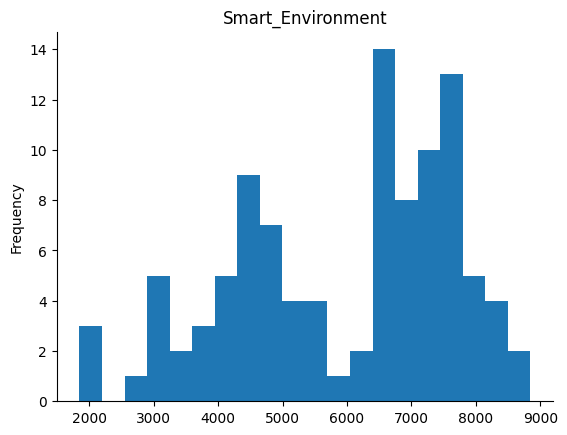

In [79]:
# @title Smart_Environment

from matplotlib import pyplot as plt
df_sin_string['Smart_Environment'].plot(kind='hist', bins=20, title='Smart_Environment')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [70]:
# @title Excluimos a la columna City
df_sin_string  = df.drop(['Id','City'], axis=1)

In [71]:
# @title Excluimos a la columna Country
df_sin_string = df.drop (['Id','City', 'Country'], axis=1)


#Medidas de tendencia central:

In [72]:
# @title Media
df_sin_string.mean()

Smart_Mobility                       5759.401961
Smart_Environment                    5943.500000
Smart_Government                     5893.803922
Smart_Economy                        6131.803922
Smart_People                         5874.049020
Smart_Living                         6377.039216
SmartCity_Index                      5991.911765
SmartCity_Index_relative_Edmonton    -480.392157
dtype: float64

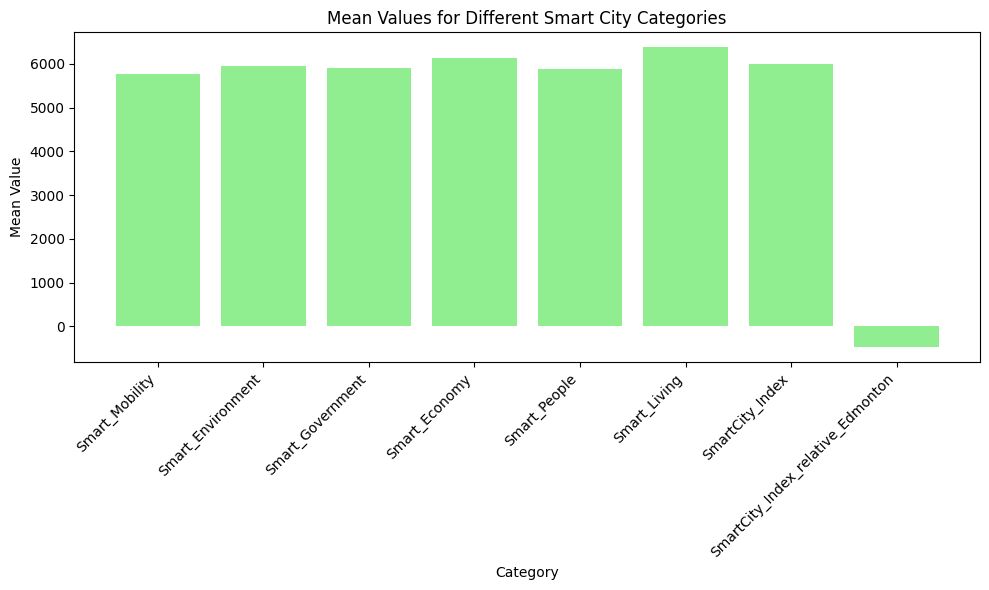

In [83]:


# Data for mean values
data_mean = {
    'Category': ['Smart_Mobility', 'Smart_Environment', 'Smart_Government', 'Smart_Economy', 'Smart_People', 'Smart_Living', 'SmartCity_Index', 'SmartCity_Index_relative_Edmonton'],
    'Mean': [5759.401961, 5943.500000, 5893.803922, 6131.803922, 5874.049020, 6377.039216, 5991.911765, -480.392157]
}

# Create DataFrame
df_mean = pd.DataFrame(data_mean)

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(df_mean['Category'], df_mean['Mean'], color='lightgreen')
plt.xlabel('Category')
plt.ylabel('Mean Value')
plt.title('Mean Values for Different Smart City Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()



> Conclusión



Al observar los valores medios proporcionados para cada categoría de Smart City Index, podemos extraer conclusiones más precisas sobre el rendimiento promedio en cada área:

1. Comparación de áreas: La media nos permite comparar directamente el rendimiento promedio en cada área de desarrollo de las ciudades inteligentes. Por ejemplo, podemos observar que el puntaje promedio es más alto en Smart Living (6377.04) en comparación con otras áreas como Smart Mobility (5759.40) y Smart Government (5893.80).

2. Áreas prioritarias: Las áreas con puntuaciones más bajas en promedio pueden ser identificadas como posibles áreas de mejora o priorización en el desarrollo de ciudades inteligentes. Por ejemplo, si Smart Mobility tiene una puntuación promedio más baja en comparación con otras áreas, podría ser una señal para centrarse en mejorar la movilidad inteligente en las ciudades.

3. Referencia con Edmonton: La columna "SmartCity_Index_relative_Edmonton" compara el índice de cada ciudad con el de Edmonton. Una media negativa indica que la ciudad tiene un índice promedio más bajo que Edmonton. Esto puede ser útil para identificar áreas donde las ciudades están rezagadas en comparación con Edmonton y pueden requerir atención adicional para cerrar la brecha.

4. Identificación de fortalezas y debilidades: Al comparar las medias de diferentes áreas, podemos identificar las fortalezas y debilidades relativas de cada ciudad en términos de su desarrollo como ciudad inteligente. Esto proporciona información valiosa para la planificación estratégica y la toma de decisiones para mejorar la calidad de vida y la eficiencia en las ciudades.

En resumen, al analizar las medias de las diferentes categorías de Smart City Index, podemos obtener una comprensión más precisa del rendimiento promedio en cada área y utilizar esta información para orientar las acciones y políticas destinadas a mejorar el desarrollo de ciudades inteligentes.



In [73]:
# @title Mediana
mediana = df_sin_string.median()
mediana

Smart_Mobility                       5651.5
Smart_Environment                    6495.0
Smart_Government                     5911.0
Smart_Economy                        6432.5
Smart_People                         5747.5
Smart_Living                         6485.0
SmartCity_Index                      6261.5
SmartCity_Index_relative_Edmonton    -210.5
dtype: float64

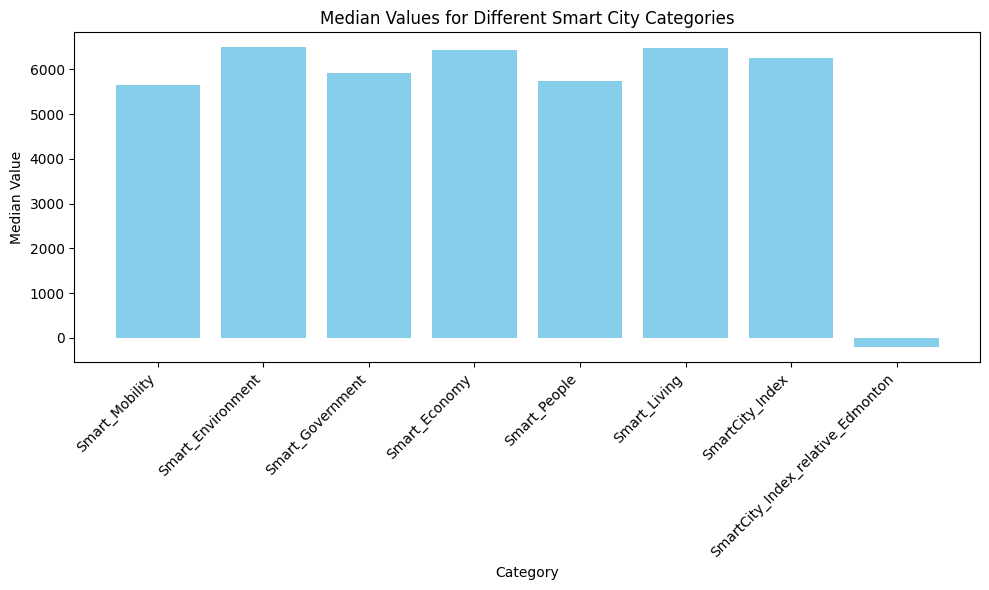

In [82]:


# Create a sample dataframe similar to the one described
data = {
    'Category': ['Smart_Mobility', 'Smart_Environment', 'Smart_Government', 'Smart_Economy', 'Smart_People', 'Smart_Living', 'SmartCity_Index', 'SmartCity_Index_relative_Edmonton'],
    'Median': [5651.5, 6495.0, 5911.0, 6432.5, 5747.5, 6485.0, 6261.5, -210.5]
}

df_median = pd.DataFrame(data)

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(df_median['Category'], df_median['Median'], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Median Value')
plt.title('Median Values for Different Smart City Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()




> Conclusión


Al analizar los valores medianos proporcionados para cada categoría de Smart City Index, podemos obtener una conclusión más detallada y precisa sobre el rendimiento central en cada área:

1. Representación del centro de los datos: La mediana es el valor que se encuentra en el centro de un conjunto de datos ordenados, lo que indica el punto medio en la distribución de puntajes para cada área. Por lo tanto, las medianas proporcionan una representación robusta del rendimiento central en cada categoría de Smart City Index.

2. Equilibrio en la distribución de datos: Al observar las medianas, podemos inferir que aproximadamente la mitad de las ciudades tienen puntajes por encima de la mediana y la otra mitad tienen puntajes por debajo de la mediana en cada categoría respectiva. Esto sugiere un equilibrio relativo en la distribución de puntajes en cada área.

3. Diferencias entre áreas: Al comparar las medianas de diferentes categorías, podemos identificar áreas donde las ciudades tienden a tener un rendimiento central más alto o más bajo. Por ejemplo, la mediana más alta se encuentra en Smart Living (6485.0), lo que indica que la mitad de las ciudades tienen un rendimiento central más alto en términos de calidad de vida inteligente en comparación con otras áreas.

4. Referencia con Edmonton: Al igual que con la media, la columna "SmartCity_Index_relative_Edmonton" compara el índice de cada ciudad con el de Edmonton. Una mediana negativa en esta columna indica que la mitad de las ciudades tienen un índice mediano más bajo que Edmonton.

En resumen, al analizar las medianas de las diferentes categorías de Smart City Index, obtenemos una visión más detallada y precisa del rendimiento central en cada área, lo que nos permite comprender mejor la distribución de puntajes y las tendencias en el desarrollo de ciudades inteligentes.

In [74]:
# @title Moda
moda= df_sin_string.mode()
moda


,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index,SmartCity_Index_relative_Edmonton
0,5512.0,5224.0,5732.0,4905.0,4385.0,3950.0,6771.0,-2281
1,7490.0,7090.0,5932.0,6925.0,4590.0,NaN,6852.0,-2244
2,NaN,7102.0,6038.0,8022.0,6703.0,NaN,NaN,-2175
3,NaN,8312.0,6396.0,NaN,6955.0,NaN,NaN,-2160
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2108
...,...,...,...,...,...,...,...,...
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,679
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,698
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,823
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,839


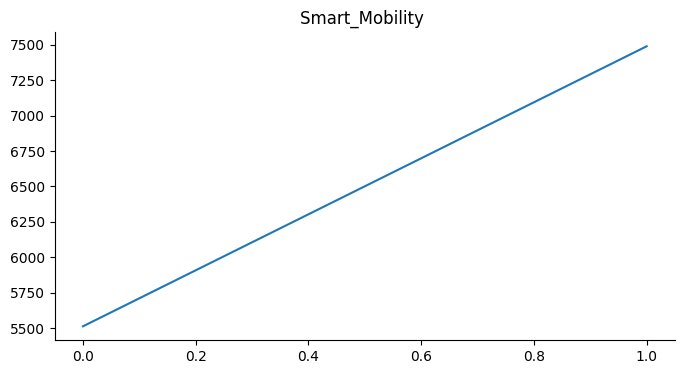

In [81]:
# @title Smart_Mobility

from matplotlib import pyplot as plt
moda['Smart_Mobility '].plot(kind='line', figsize=(8, 4), title='Smart_Mobility ')
plt.gca().spines[['top', 'right']].set_visible(False)

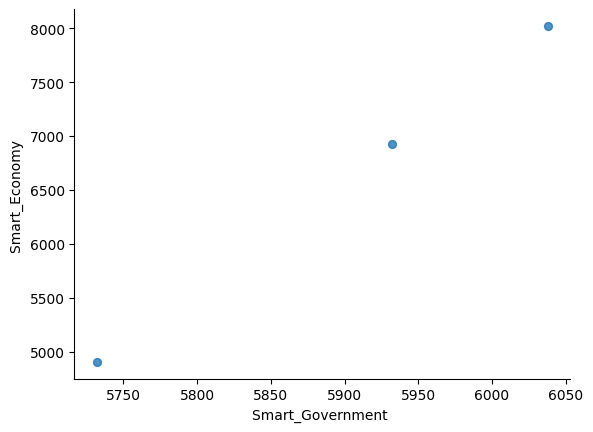

In [80]:
# @title Smart_Government  vs Smart_Economy

from matplotlib import pyplot as plt
moda.plot(kind='scatter', x='Smart_Government ', y='Smart_Economy ', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)



> Conclusión


Observando los valores modales proporcionados en el conjunto de datos para cada categoría de Smart City Index, podemos deducir lo siguiente:

1. Dominio de ciertos puntajes: En algunas categorías, como Smart Government y Smart Economy, hay valores modales específicos que sugieren que ciertos puntajes son más comunes en esas áreas. Por ejemplo, en Smart Government, el valor modal es 5932.0, lo que indica que este puntaje es bastante frecuente entre las ciudades para esta categoría.

2. Falta de datos: En algunas instancias, como en Smart Living, hay valores modales faltantes (NaN), lo que sugiere que no hay un valor modal claro debido a la falta de datos disponibles para esa categoría en esas instancias específicas.

3. Dispersión de datos: Cuando hay múltiples valores modales o una frecuencia muy baja de valores, puede indicar una mayor dispersión en los puntajes en esa área. Por ejemplo, en Smart Mobility, hay múltiples valores modales, lo que sugiere una distribución más dispersa de puntajes en esa categoría.

4. Valores extremos: Algunos valores modales, como -2281 en SmartCity_Index_relative_Edmonton, podrían indicar la presencia de ciudades con puntajes considerablemente diferentes en comparación con la ciudad de Edmonton. Esto puede ser útil para identificar ciudades que se destacan significativamente en comparación con la ciudad de referencia.

En resumen, al analizar los valores modales, podemos identificar patrones y tendencias en los puntajes de las diferentes categorías de Smart City Index, lo que nos ayuda a comprender mejor la distribución y la frecuencia de los puntajes en cada área de desarrollo de las ciudades inteligentes.

In [75]:
df_sin_string.min()


Smart_Mobility                       3175
Smart_Environment                    1850
Smart_Government                     2806
Smart_Economy                        1490
Smart_People                         2825
Smart_Living                         1980
SmartCity_Index                      4191
SmartCity_Index_relative_Edmonton   -2281
dtype: int64

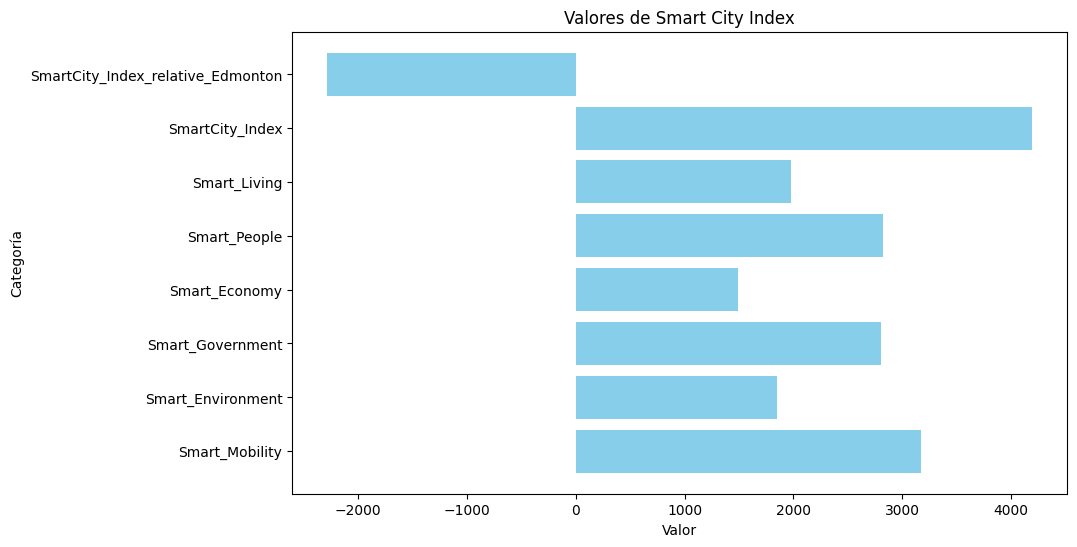

In [84]:


# Datos del DataFrame
categories = ['Smart_Mobility', 'Smart_Environment', 'Smart_Government', 'Smart_Economy', 'Smart_People', 'Smart_Living', 'SmartCity_Index', 'SmartCity_Index_relative_Edmonton']
values = [3175, 1850, 2806, 1490, 2825, 1980, 4191, -2281]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(categories, values, color='skyblue')

# Añadir título y etiquetas
plt.title('Valores de Smart City Index')
plt.xlabel('Valor')
plt.ylabel('Categoría')

# Mostrar el gráfico
plt.show()




> Conclusión


Al observar los valores mínimos proporcionados para cada categoría de Smart City Index, podemos obtener una conclusión precisa y detallada sobre los valores mínimos registrados en cada área:

1. Límites inferiores de los puntajes: Los valores mínimos representan los puntajes más bajos registrados en cada categoría de Smart City Index en el conjunto de datos. Por ejemplo, en Smart Mobility, el puntaje mínimo es 3175, lo que indica el nivel más bajo de desarrollo en términos de movilidad inteligente entre todas las ciudades incluidas.

2. Identificación de áreas con mayor necesidad de mejora: Las categorías con valores mínimos más bajos pueden indicar áreas donde las ciudades tienen un desarrollo más deficiente en comparación con otras áreas. Por ejemplo, si Smart Economy tiene un valor mínimo más bajo que otras categorías, esto puede señalar una mayor necesidad de mejorar la economía inteligente en esas ciudades.

3. Referencia con Edmonton: Al igual que con la media y la mediana, la columna "SmartCity_Index_relative_Edmonton" compara el índice de cada ciudad con el de Edmonton. Un valor mínimo negativo en esta columna indica que una ciudad tiene un índice mínimo más bajo que Edmonton.

4. Consideraciones para la planificación y la toma de decisiones: Identificar los valores mínimos en cada área es importante para la planificación estratégica y la toma de decisiones. Estos valores pueden ayudar a priorizar áreas específicas para intervenciones y mejoras, así como identificar desafíos que deben abordarse en el desarrollo de ciudades inteligentes.

En resumen, al analizar los valores mínimos de las diferentes categorías de Smart City Index, podemos identificar áreas críticas para la mejora y comprender mejor las brechas en el desarrollo de ciudades inteligentes entre las ciudades incluidas en el conjunto de datos.

In [76]:
df_sin_string.max()

Smart_Mobility                        8110
Smart_Environment                     8844
Smart_Government                      8726
Smart_Economy                         9225
Smart_People                          9695
Smart_Living                         10000
SmartCity_Index                       7353
SmartCity_Index_relative_Edmonton      880
dtype: int64

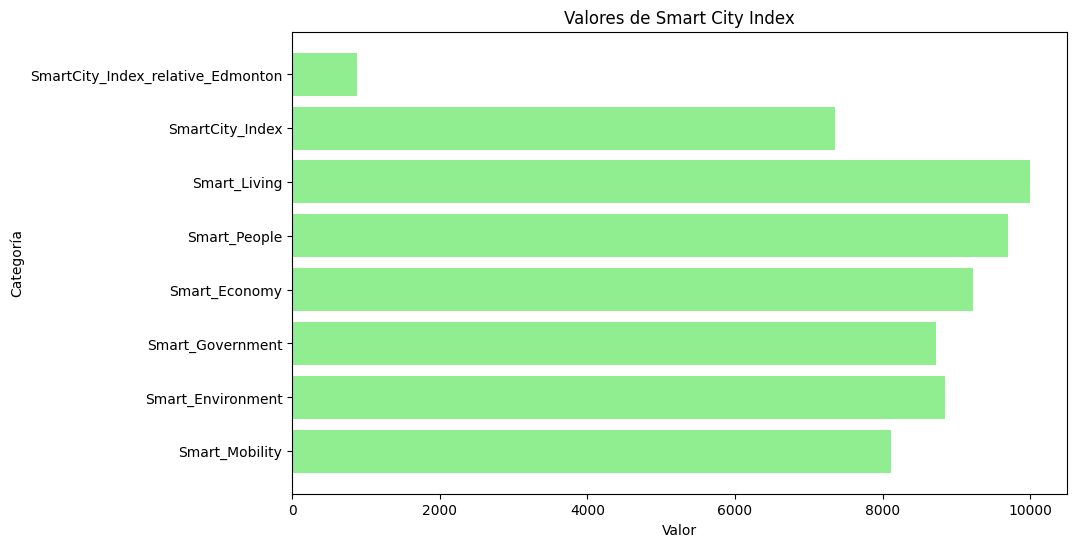

In [85]:


# Datos del DataFrame
categories = ['Smart_Mobility', 'Smart_Environment', 'Smart_Government', 'Smart_Economy', 'Smart_People', 'Smart_Living', 'SmartCity_Index', 'SmartCity_Index_relative_Edmonton']
values = [8110, 8844, 8726, 9225, 9695, 10000, 7353, 880]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(categories, values, color='lightgreen')

# Añadir título y etiquetas
plt.title('Valores de Smart City Index')
plt.xlabel('Valor')
plt.ylabel('Categoría')

# Mostrar el gráfico
plt.show()




> Conclusión


Al examinar los valores máximos proporcionados para cada categoría de Smart City Index, podemos extraer una conclusión detallada y precisa sobre los valores máximos registrados en cada área:

1. Alcance máximo de los puntajes: Los valores máximos representan los puntajes más altos registrados en cada categoría de Smart City Index en el conjunto de datos. Por ejemplo, en Smart Living, el puntaje máximo es 10,000, lo que indica un alto nivel de desarrollo en términos de calidad de vida inteligente en al menos una ciudad incluida en el conjunto de datos.

2. Identificación de áreas destacadas: Las categorías con valores máximos más altos pueden indicar áreas donde algunas ciudades han logrado un desarrollo excepcional en comparación con otras áreas. Por ejemplo, si Smart Economy tiene un valor máximo más alto que otras categorías, esto puede señalar ciudades que han logrado un alto nivel de desarrollo económico inteligente.

3. Referencia con Edmonton: Al igual que con la media, la mediana y el mínimo, la columna "SmartCity_Index_relative_Edmonton" compara el índice de cada ciudad con el de Edmonton. Un valor máximo positivo en esta columna indica que una ciudad tiene un índice máximo más alto que Edmonton.

4. Identificación de modelos a seguir: Los valores máximos proporcionan ejemplos de ciudades que han logrado un alto nivel de desarrollo en áreas específicas de la inteligencia urbana. Estas ciudades pueden servir como modelos a seguir para otras ciudades que buscan mejorar su desarrollo como ciudades inteligentes.

En resumen, al analizar los valores máximos de las diferentes categorías de Smart City Index, podemos identificar áreas de destacada excelencia, entender los límites superiores del desarrollo en cada área y obtener ejemplos de mejores prácticas para impulsar el desarrollo de ciudades más inteligentes y sostenibles en el futuro.

# Medidas de dispersión

In [77]:
 # @title Rango
df_sin_string.max() - df_sin_string.min()

Smart_Mobility                       4935
Smart_Environment                    6994
Smart_Government                     5920
Smart_Economy                        7735
Smart_People                         6870
Smart_Living                         8020
SmartCity_Index                      3162
SmartCity_Index_relative_Edmonton    3161
dtype: int64

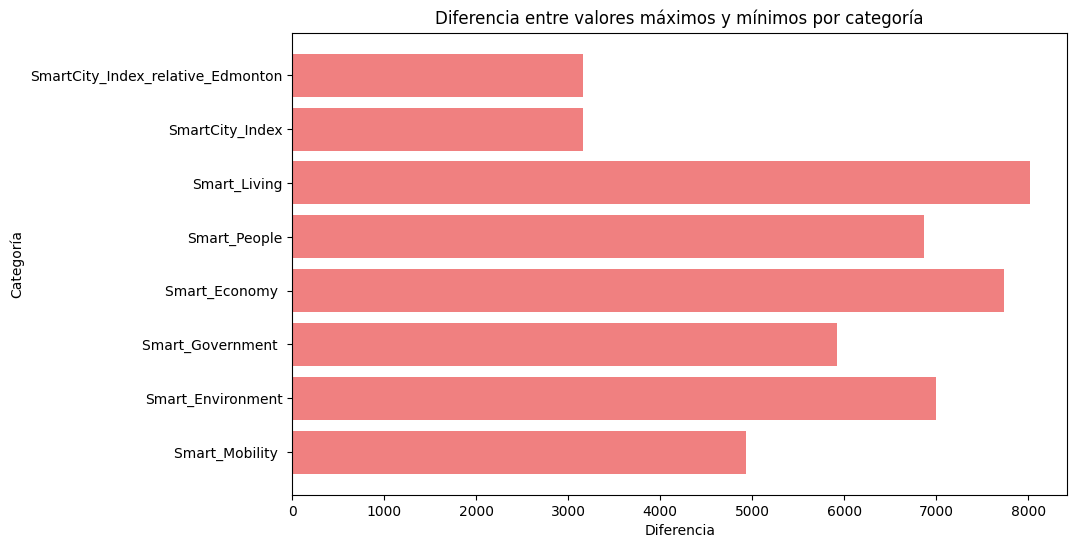

In [86]:


# Calcular la diferencia entre los valores máximos y mínimos
differences = df_sin_string.max() - df_sin_string.min()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(differences.index, differences, color='lightcoral')

# Añadir título y etiquetas
plt.title('Diferencia entre valores máximos y mínimos por categoría')
plt.xlabel('Diferencia')
plt.ylabel('Categoría')

# Mostrar el gráfico
plt.show()




>Conclusión


1.  Variabilidad en el Desarrollo de Ciudades Inteligentes: La amplitud de los rangos indica que hay una considerable variabilidad en el desarrollo de ciudades inteligentes en diferentes áreas. Por ejemplo, el rango más grande se encuentra en Smart Living, lo que sugiere que hay una amplia gama de puntajes entre las ciudades en términos de calidad de vida inteligente.

2.   Elemento de la lista: Énfasis en Áreas Específicas: Las diferencias en los rangos también pueden indicar en qué áreas se está poniendo más énfasis en el desarrollo de ciudades inteligentes. Por ejemplo, el rango de Smart Economy es bastante grande, lo que podría indicar una diversidad de enfoques y estrategias en esta área específica.

3. Necesidades de Mejora: Los rangos más pequeños podrían indicar áreas donde la mayoría de las ciudades tienen un rendimiento similar o donde hay un consenso sobre las mejores prácticas. Por otro lado, los rangos más grandes podrían señalar áreas donde algunas ciudades están rezagadas y podrían beneficiarse de mejoras.

En resumen, al observar los rangos de los puntajes en diferentes áreas de desarrollo de ciudades inteligentes, podemos obtener una comprensión más detallada de la diversidad y la variabilidad en el progreso de estas ciudades en su camino hacia la inteligencia urbana. Esto puede ayudar a identificar áreas de enfoque y oportunidades de mejora para impulsar el desarrollo de ciudades más inteligentes y sostenibles en el futuro.

In [78]:
# @title Desviación Estandar
desviacion_estandar = df_sin_string.std()
desviacion_estandar

Smart_Mobility                       1214.030137
Smart_Environment                    1724.032171
Smart_Government                     1153.375297
Smart_Economy                        1801.555148
Smart_People                         1449.096341
Smart_Living                         2286.397477
SmartCity_Index                       852.775180
SmartCity_Index_relative_Edmonton     852.783238
dtype: float64

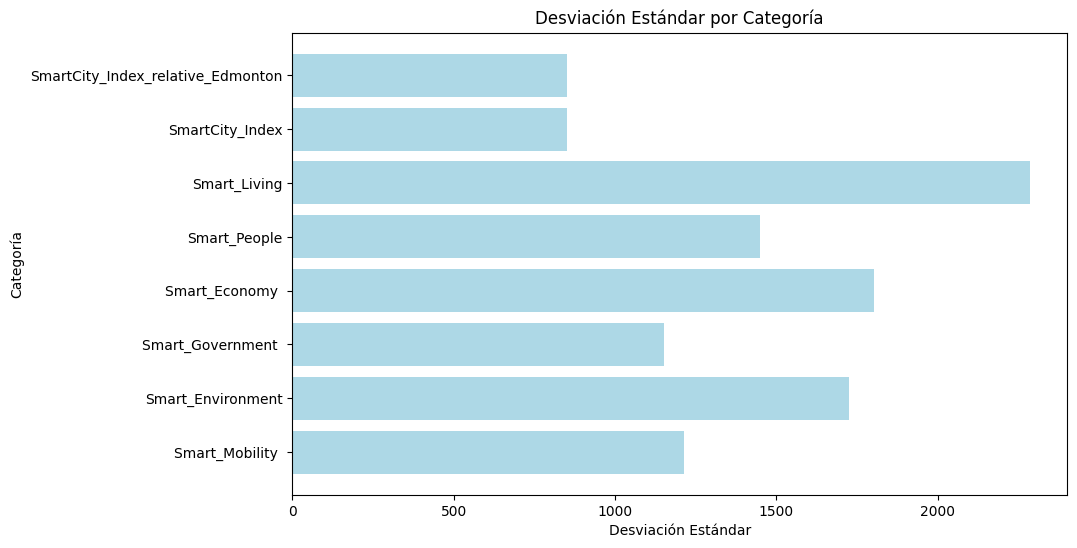

In [87]:

# Desviación estándar de cada categoría
desviacion_estandar = df_sin_string.std()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(desviacion_estandar.index, desviacion_estandar, color='lightblue')

# Añadir título y etiquetas
plt.title('Desviación Estándar por Categoría')
plt.xlabel('Desviación Estándar')
plt.ylabel('Categoría')

# Mostrar el gráfico
plt.show()




> Conclusión

Al examinar los valores de desviación estándar proporcionados para cada categoría de Smart City Index, podemos extraer una conclusión detallada y precisa sobre la variabilidad de los puntajes en cada área:

1. Dispersión de los datos: La desviación estándar nos indica cuánto se dispersan los puntajes alrededor de la media en cada categoría de Smart City Index. Valores más altos de desviación estándar indican una mayor dispersión de los puntajes, mientras que valores más bajos indican una dispersión más estrecha.

2. Variabilidad en el desarrollo de ciudades inteligentes: Al observar los valores de desviación estándar, podemos identificar áreas donde hay una mayor variabilidad en el desarrollo de ciudades inteligentes. Por ejemplo, Smart Living tiene la desviación estándar más alta (2286.40), lo que sugiere que hay una amplia variabilidad en los puntajes en esta área, posiblemente debido a diferencias significativas en la calidad de vida entre ciudades.

3. Consistencia en el desarrollo: Las categorías con valores de desviación estándar más bajos pueden indicar áreas donde hay una mayor consistencia en el desarrollo de ciudades inteligentes. Por ejemplo, Smart Government tiene una desviación estándar relativamente baja (1153.38), lo que sugiere que hay una consistencia más estrecha en los puntajes en esta área entre las ciudades.

4. Comparación con Edmonton: Al igual que con las otras medidas estadísticas, también podemos comparar la desviación estándar de cada ciudad con la de Edmonton. Esto nos permite comprender cómo se dispersan los puntajes de cada ciudad en relación con la ciudad de referencia.

En resumen, al analizar los valores de desviación estándar de las diferentes categorías de Smart City Index, podemos obtener información sobre la variabilidad y la consistencia en el desarrollo de ciudades inteligentes en diferentes áreas, lo que nos ayuda a comprender mejor las tendencias y los patrones en la evolución de las ciudades inteligentes.

